In [1]:
import numpy as np
import matplotlib.pyplot as plt #there might be a problem with the concatenation
import scipy.io
import functools as ft

mat = scipy.io.loadmat('spamData.mat')

mat['Xtrain'] = np.log(mat['Xtrain'] + 0.1)
mat['Xtest'] = np.log(mat['Xtest'] + 0.1)
flattened_ytest = mat['ytest'].flatten()
flattened_ytrain = mat['ytrain'].flatten()
bias_Xtest = [np.concatenate(([np.log(1.1)],item), axis = None) for item in mat['Xtest']] #add bias term for Xtest
bias_Xtrain = [np.concatenate(([np.log(1.1)],item), axis = None) for item in mat['Xtrain']] #add bias term for Xtrain

sub_1 = np.arange(1,11)
sub_2 = np.arange(15,105,5)
big = np.concatenate((sub_1,sub_2), axis = None)

correct_list = np.array([]) #need to add one more correct_list_train done
correct_list_train = np.array([])

for lam in big:
    w = np.zeros((58,1)) #initial value for w
    w_e = w.copy()
    w_e[0][0] = 0 #exclude bias from regularization

    while True: #this is to run an infinite loop until the w converges
        mew = np.dot(w.transpose(),np.array(bias_Xtrain).transpose())
        mew_chain = 1/(1+np.exp(-mew.transpose())) #this is the correct one, do not touch
        bias_Xtrain_transpose = np.array(bias_Xtrain).transpose()
        g = np.dot(bias_Xtrain_transpose,(mew_chain - mat['ytrain'])) + lam*w_e #computes the g
        diagonal_array = mew_chain.flatten()*(1-mew_chain.flatten())
        S = np.diag(diagonal_array)
        adjusted_identity = np.identity(58)
        adjusted_identity[0][0] = 0
        Hessian = ft.reduce(np.dot,[bias_Xtrain_transpose,S,np.array(bias_Xtrain)]) + lam*adjusted_identity #computes Hessian
        dk = -np.dot(np.linalg.inv(Hessian),g)
        w += dk
        w_e = w.copy()
        w_e[0][0] = 0
        if -1e-13 <= sum(dk.flatten()) <= 1e-13: #when w converges, break out of the loop
            break

############apply w on the test set below, predict and compute test error rate ####################################################             
    mew_test = np.dot(w.transpose(),np.array(bias_Xtest).transpose())
    mew_chain_test1 = np.log(1/(1+np.exp(-mew_test.transpose())))

    mew_chain_test0 = np.log(1-1/(1+np.exp(-mew_test.transpose())))

    correct = 0
    for i in range(1536): #deal with the 1536 later
        if (mew_chain_test1.flatten() > mew_chain_test0.flatten()).astype(int)[i] == flattened_ytest[i]:
            correct += 1
    correct_list = np.append(correct_list,[1-correct/1536], axis = 0)
    print(correct_list)
    
############apply w on the training set below, predict and compute training error rate ################################################    
    

    mew_test = np.dot(w.transpose(),np.array(bias_Xtrain).transpose())
    mew_chain_test1 = np.log(1/(1+np.exp(-mew_test.transpose())))

    mew_chain_test0 = np.log(1-1/(1+np.exp(-mew_test.transpose())))

    correct_train = 0
    for i in range(3065): 
        if (mew_chain_test1.flatten() > mew_chain_test0.flatten()).astype(int)[i] == flattened_ytrain[i]:
            correct_train += 1
    correct_list_train = np.append(correct_list_train,[1-correct_train/3065], axis = 0)
    print(correct_list_train)
print(correct_list) #print the test error rate list
print(correct_list[0])
print(correct_list[9])
print(correct_list[-1])
print(correct_list_train) # printing the training error rate list
print(correct_list_train[0])
print(correct_list_train[9])
print(correct_list_train[-1])

    #print(correct)
    #print(correct/1536)

[0.05859375]
[0.04893964]
[0.05859375 0.05794271]
[0.04893964 0.04959217]
[0.05859375 0.05794271 0.05794271]
[0.04893964 0.04959217 0.04763458]
[0.05859375 0.05794271 0.05794271 0.05729167]
[0.04893964 0.04959217 0.04763458 0.04763458]
[0.05859375 0.05794271 0.05794271 0.05729167 0.05924479]
[0.04893964 0.04959217 0.04763458 0.04763458 0.04828711]
[0.05859375 0.05794271 0.05794271 0.05729167 0.05924479 0.05924479]
[0.04893964 0.04959217 0.04763458 0.04763458 0.04828711 0.04763458]
[0.05859375 0.05794271 0.05794271 0.05729167 0.05924479 0.05924479
 0.05989583]
[0.04893964 0.04959217 0.04763458 0.04763458 0.04828711 0.04763458
 0.04796085]
[0.05859375 0.05794271 0.05794271 0.05729167 0.05924479 0.05924479
 0.05989583 0.05924479]
[0.04893964 0.04959217 0.04763458 0.04763458 0.04828711 0.04763458
 0.04796085 0.04828711]
[0.05859375 0.05794271 0.05794271 0.05729167 0.05924479 0.05924479
 0.05989583 0.05924479 0.06054688]
[0.04893964 0.04959217 0.04763458 0.04763458 0.04828711 0.04763458
 0.

[0.05859375 0.05794271 0.05794271 0.05729167 0.05924479 0.05924479
 0.05989583 0.05924479 0.06054688 0.06054688 0.06054688 0.06184896
 0.06119792 0.06184896 0.06184896 0.06184896 0.0625     0.0625
 0.0625     0.06380208 0.06445312 0.06445312 0.06445312 0.06575521
 0.06640625 0.06705729 0.06835938 0.06835938]
[0.04893964 0.04959217 0.04763458 0.04763458 0.04828711 0.04763458
 0.04796085 0.04828711 0.04893964 0.04926591 0.04991843 0.05089723
 0.0502447  0.05057096 0.05089723 0.05187602 0.05285481 0.05448613
 0.05546493 0.05546493 0.05644372 0.05807504 0.05840131 0.06003263
 0.06003263 0.06003263 0.06166395 0.06264274]
[0.05859375 0.05794271 0.05794271 0.05729167 0.05924479 0.05924479
 0.05989583 0.05924479 0.06054688 0.06054688 0.06054688 0.06184896
 0.06119792 0.06184896 0.06184896 0.06184896 0.0625     0.0625
 0.0625     0.06380208 0.06445312 0.06445312 0.06445312 0.06575521
 0.06640625 0.06705729 0.06835938 0.06835938]
0.05859375
0.060546875
0.068359375
[0.04893964 0.04959217 0.047634

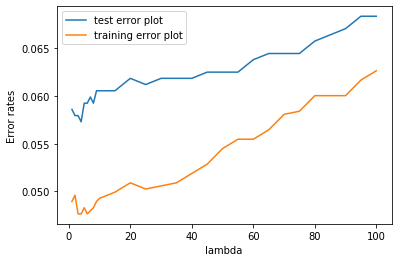

In [2]:
plt.plot(big, correct_list, label = 'test error plot')
plt.plot(big, correct_list_train, label = 'training error plot')
plt.xlabel('lambda')
plt.ylabel('Error rates')
plt.legend()
plt.show()